In [1]:
# 데이터 처리 함수 
import pandas as pd 
import numpy as np
# 데이터 시각화 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [3]:
df1 = pd.read_csv('ex3.csv')

In [4]:
df1.shape

(1309, 15)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Passenger Class       1309 non-null   int64  
 1   Survived              1309 non-null   object 
 2   Name                  1309 non-null   object 
 3   Sex                   1309 non-null   object 
 4   Age                   1046 non-null   float64
 5   Siblings and Spouses  1309 non-null   int64  
 6   Parents and Children  1309 non-null   int64  
 7   Ticket #              1309 non-null   object 
 8   Fare                  1308 non-null   float64
 9   Cabin                 295 non-null    object 
 10  Port                  1307 non-null   object 
 11  Lifeboat              486 non-null    object 
 12  Body                  121 non-null    float64
 13  Home / Destination    745 non-null    object 
 14  Midpoint age          1046 non-null   float64
dtypes: float64(4), int64(

In [6]:
df1['Survived'].value_counts()

No     809
Yes    500
Name: Survived, dtype: int64

In [8]:
df1['Target'] = df1['Survived'].replace({'Yes':1, 'No':0})

In [9]:
df1.describe()

,Passenger Class,Age,Siblings and Spouses,Parents and Children,Fare,Body,Midpoint age,Target
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000,1046.00000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917,30.40631,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922,14.60369,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000,2.50000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000,22.50000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000,27.50000,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000,37.50000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000,82.50000,1.000000


In [13]:
numeric_list = df1.describe().columns.tolist()
total_list = df1.columns.tolist()

In [16]:
object_list = list(set(total_list) - set(numeric_list))

In [18]:
df1[object_list].describe()

,Home / Destination,Sex,Name,Cabin,Lifeboat,Ticket #,Survived,Port
count,745,1309,1309,295,486,1309,1309,1307
unique,369,2,1307,186,27,929,2,3
top,"New York, NY",male,"Kelly, Mr. James",C23 C25 C27,13,CA. 2343,No,S
freq,64,843,2,6,39,11,809,914


In [20]:
data1 = df1.drop(columns=['Home / Destination','Name','Ticket #','Cabin','Survived'])
data1.shape

(1309, 11)

In [21]:
data1.isnull().sum()

Passenger Class            0
Sex                        0
Age                      263
Siblings and Spouses       0
Parents and Children       0
Fare                       1
Port                       2
Lifeboat                 823
Body                    1188
Midpoint age             263
Target                     0
dtype: int64

In [25]:
data1['Lifeboat'] = data1['Lifeboat'].fillna('No')

In [28]:
data1['Midpoint age'] = data1['Midpoint age'].fillna(data1['Midpoint age'].median())

In [29]:
data1['Age'] = data1['Age'].fillna(data1['Age'].median())

In [33]:
data2 = data1.drop(columns='Body').dropna()

In [34]:
data2.to_csv('preprocessing_Data.csv')

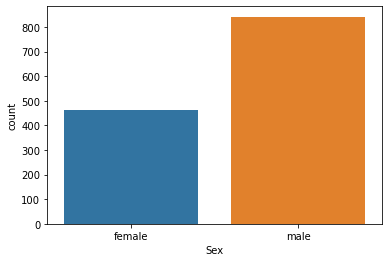

In [36]:
sns.countplot(data=data2, x='Sex')

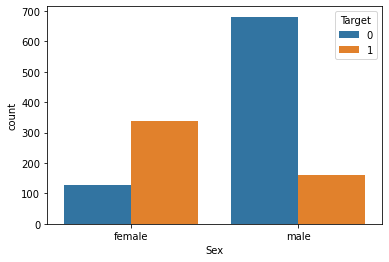

In [37]:
sns.countplot(data=data2, x='Sex', hue='Target')

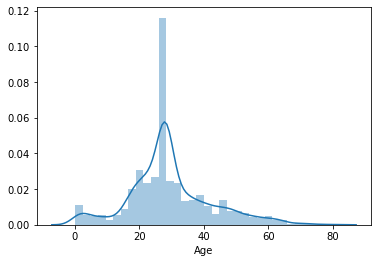

In [38]:
sns.distplot(data2['Age'])

In [39]:
data2_y = data2.loc[(data2['Target']==1)]
data2_n = data2.loc[(data2['Target']==0)]

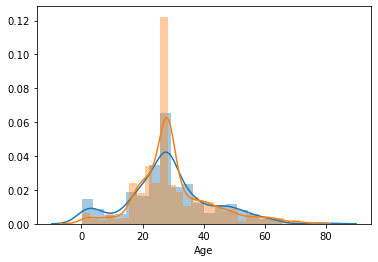

In [40]:
sns.distplot(data2_y['Age'])
sns.distplot(data2_n['Age'])

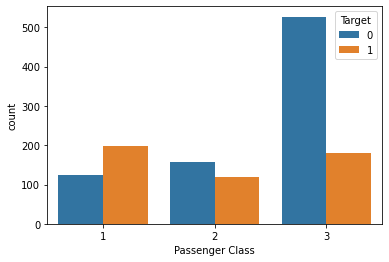

In [43]:
sns.countplot(data=data2, x='Passenger Class',hue='Target')

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [47]:
X = data2.drop(columns='Target')
X = pd.get_dummies(X)

In [48]:
Y = data2['Target']

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1234)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1044, 39)
(262, 39)
(1044,)
(262,)


In [50]:
model_pip_DT = Pipeline([  ('scaler',MinMaxScaler()),
                           ('model_DT',DecisionTreeClassifier())])

In [51]:
model_pip_DT.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model_DT', DecisionTreeClassifier())])

In [52]:
param_list = {'model_DT__criterion':['gini','entropy'],
             'model_DT__max_depth':[3,4,5,6,7],
             'model_DT__min_samples_leaf':[3,4,5,6,7]}

In [53]:
model_grid = GridSearchCV(model_pip_DT, param_grid=param_list, 
               cv=5, n_jobs= -1,scoring='f1')

In [54]:
model_grid.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model_DT', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model_DT__criterion': ['gini', 'entropy'],
                         'model_DT__max_depth': [3, 4, 5, 6, 7],
                         'model_DT__min_samples_leaf': [3, 4, 5, 6, 7]},
             scoring='f1')

In [56]:
best_model = model_grid.best_estimator_

In [57]:
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

In [58]:
print('훈련 데이터 정확도 : ', accuracy_score(Y_train,Y_pred_train))
print('테스트 데이터 정확도 : ', accuracy_score(Y_test,Y_pred_test))

훈련 데이터 정확도 :  0.9770114942528736
테스트 데이터 정확도 :  0.9694656488549618


In [59]:
print('훈련 데이터 F1 : ', f1_score(Y_train,Y_pred_train))
print('테스트 데이터 F1 : ', f1_score(Y_test,Y_pred_test))

훈련 데이터 F1 :  0.9693877551020408
테스트 데이터 F1 :  0.9578947368421052


In [60]:
# Random Forest
pip_model = Pipeline( [ ('scaler',MinMaxScaler()),
             ('model_RF', RandomForestClassifier())])
pip_model.fit(X_train,Y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model_RF', RandomForestClassifier())])

In [62]:
param_list ={'model_RF__criterion':['gini','entropy'],
            'model_RF__max_depth':[3,4,5,6,7],
            'model_RF__min_samples_leaf':[3,4,5,6,7],
            'model_RF__n_estimators':[100,150,200,250]}
model_grid= GridSearchCV(pip_model, param_grid=param_list, 
                         cv= 3, scoring='f1',n_jobs=-1 )

In [63]:
model_grid.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model_RF', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model_RF__criterion': ['gini', 'entropy'],
                         'model_RF__max_depth': [3, 4, 5, 6, 7],
                         'model_RF__min_samples_leaf': [3, 4, 5, 6, 7],
                         'model_RF__n_estimators': [100, 150, 200, 250]},
             scoring='f1')

In [64]:
print('훈련 데이터 정확도 : ', accuracy_score(Y_train,Y_pred_train))
print('테스트 데이터 정확도 : ', accuracy_score(Y_test,Y_pred_test))
print('훈련 데이터 F1 : ', f1_score(Y_train,Y_pred_train))
print('테스트 데이터 F1 : ', f1_score(Y_test,Y_pred_test))

훈련 데이터 정확도 :  0.9770114942528736
테스트 데이터 정확도 :  0.9694656488549618
훈련 데이터 F1 :  0.9693877551020408
테스트 데이터 F1 :  0.9578947368421052


In [66]:
# GradentBoosting
pip_model = Pipeline( [ ('scaler',MinMaxScaler()),
             ('model_GB', GradientBoostingClassifier())])
pip_model.fit(X_train,Y_train)

param_list ={'model_GB__criterion':['friedman_mse'],
            'model_GB__max_depth':[3,4,5,6,7],
            'model_GB__min_samples_leaf':[3,4,5,6,7],
            'model_GB__n_estimators':[100,150,200,250]}
model_grid= GridSearchCV(pip_model, param_grid=param_list, 
                         cv= 3, scoring='f1',n_jobs=-1 )

In [67]:
model_grid.fit(X_train,Y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('model_GB',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'model_GB__criterion': ['friedman_mse'],
                         'model_GB__max_depth': [3, 4, 5, 6, 7],
                         'model_GB__min_samples_leaf': [3, 4, 5, 6, 7],
                         'model_GB__n_estimators': [100, 150, 200, 250]},
             scoring='f1')

In [68]:
print('훈련 데이터 정확도 : ', accuracy_score(Y_train,Y_pred_train))
print('테스트 데이터 정확도 : ', accuracy_score(Y_test,Y_pred_test))
print('훈련 데이터 F1 : ', f1_score(Y_train,Y_pred_train))
print('테스트 데이터 F1 : ', f1_score(Y_test,Y_pred_test))

훈련 데이터 정확도 :  0.9770114942528736
테스트 데이터 정확도 :  0.9694656488549618
훈련 데이터 F1 :  0.9693877551020408
테스트 데이터 F1 :  0.9578947368421052
